In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# sklearn utilities
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.model_selection import train_test_split

# reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Data: Tabular Titnic Data (numeric + categorical)
seaborn has a ready-to-use Titanic dataset that contains numeric, categorical, and missing values.

In [2]:
try:
    df_tabular = sns.load_dataset('titanic')   # pandas DataFrame
except Exception as e:
    # fallback synthetic if seaborn dataset isn't available
    df_tabular = pd.DataFrame({
        'age': np.random.randint(1, 80, size=1000),
        'fare': np.round(np.random.exponential(50, size=1000), 2),
        'sex': np.random.choice(['male','female'], size=1000),
        'pclass': np.random.choice([1,2,3], size=1000),
        'survived': np.random.choice([0,1], size=1000, p=[0.6,0.4])
    })

print("Tabular dataset loaded: df_tabular.shape =", df_tabular.shape)

Tabular dataset loaded: df_tabular.shape = (891, 15)


In [3]:
# DATA OVERVIEW
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
display(df.describe(include='all'))

# Check missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Visualize missingness
msno.matrix(df)
plt.show()

NameError: name 'df' is not defined

In [ ]:
# Quick sanity-preview
print("- Tabular head:\n", df_tabular.head(3))

## Basic Overview of the Tabular Dataset
This gives: dataset shape, column types, missingness summary, descriptive stats, cardinality (number of unique values) of categorical features.

In [4]:
print("Shape:", df_tabular.shape)
print("\nData types:")
print(df_tabular.dtypes)

print("\nBasic info:")
print(df_tabular.info())

print("\nMissing values summary:")
print(df_tabular.isnull().sum())

print("\nDescriptive statistics (numerical features):")
display(df_tabular.describe().T)

# for categorical columns, show unique values count
cat_cols = df_tabular.select_dtypes(include=['object','category']).columns.tolist()
print("\nCategorical columns:", cat_cols)
for col in cat_cols:
    print(f"{col}: {df_tabular[col].nunique()} unique values → {df_tabular[col].unique()[:10]}")

Shape: (891, 15)

Data types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Categorical columns: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
sex: 2 unique values → ['male' 'female']
embarked: 3 unique values → ['S' 'C' 'Q' nan]
class: 3 unique values → ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
who: 3 unique values → ['man' 'woman' 'child']
deck: 7 unique values → [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
embark_town: 3 unique values → ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive: 2 unique values → ['no' 'yes']


## Visual Missingness Map
Let's visualize the missing values distribution to quickly identify any patterns (e.g., “Age” missing more for certain groups).

<Figure size 1000x500 with 0 Axes>

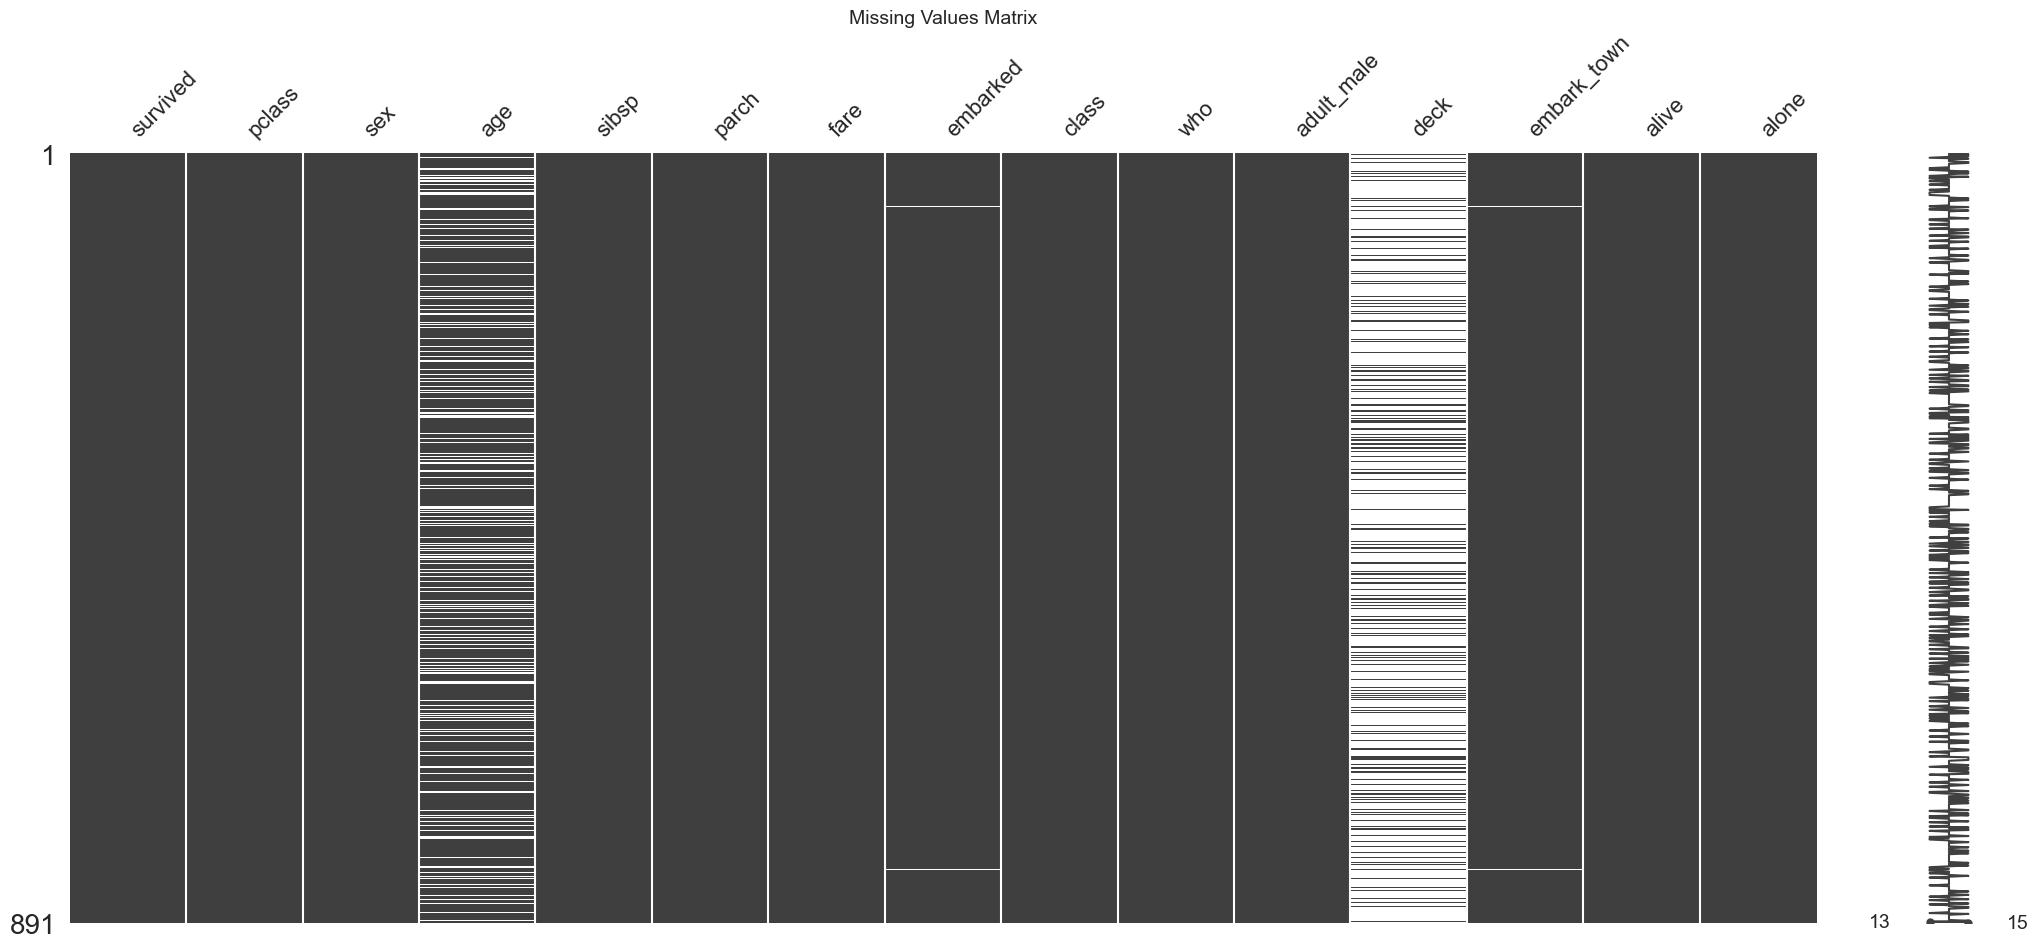

<Figure size 800x400 with 0 Axes>

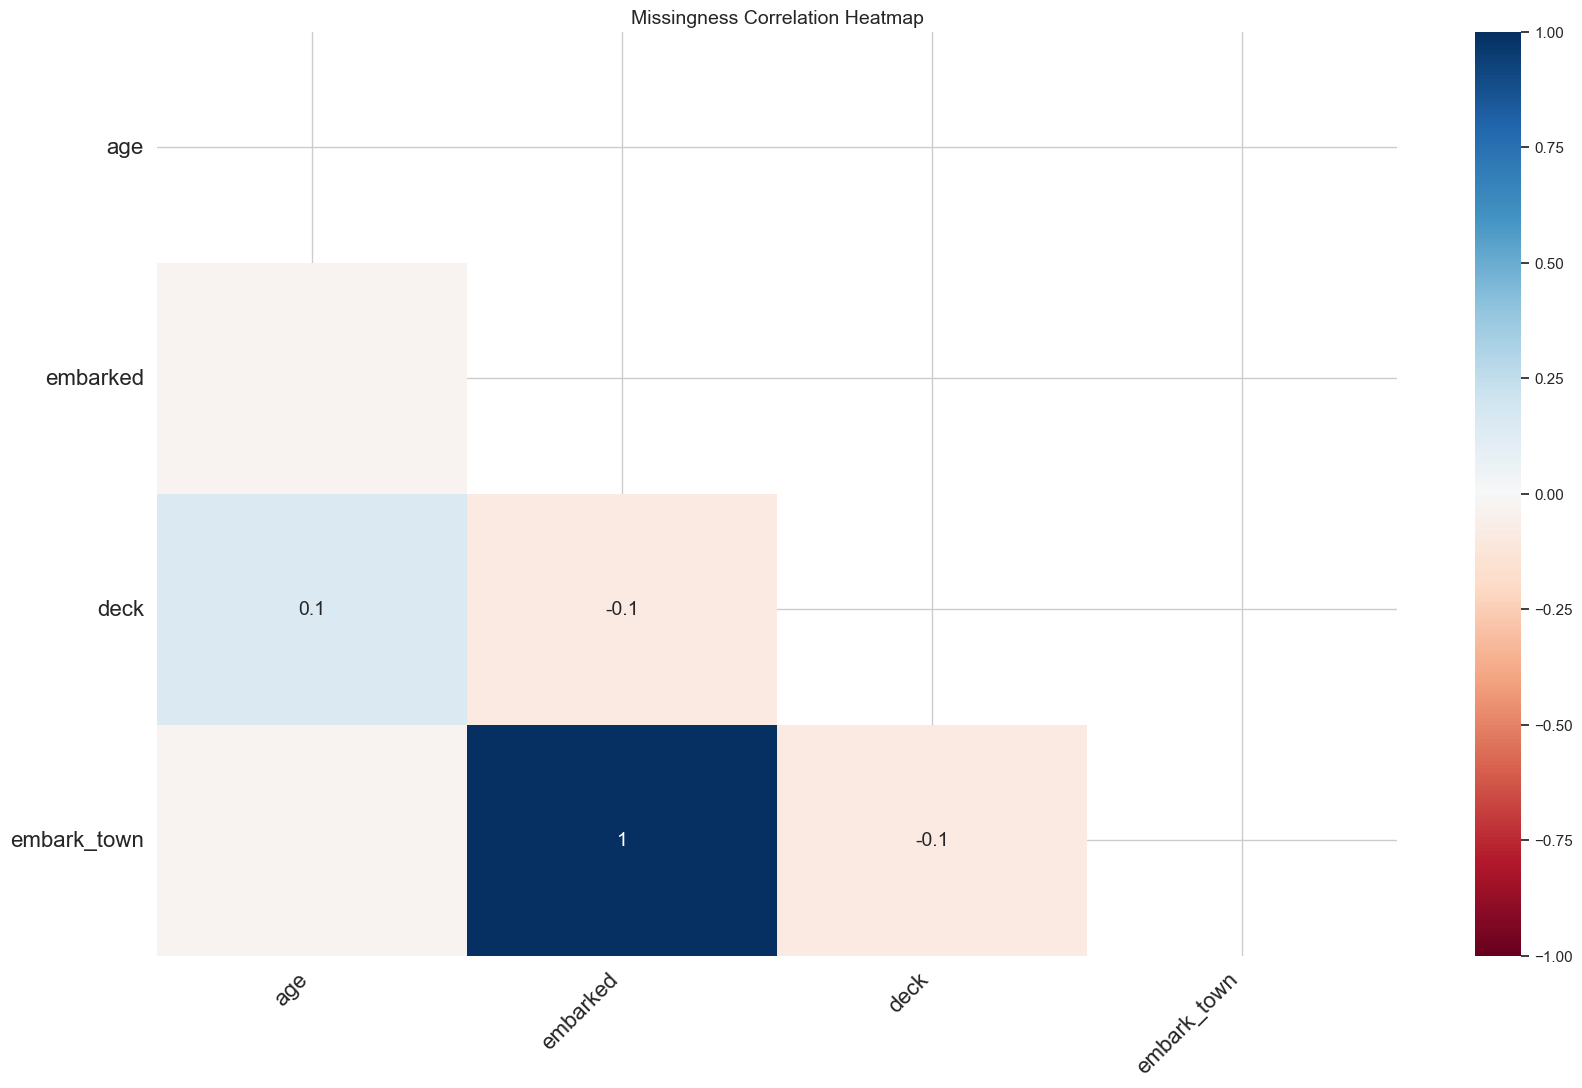

In [5]:
import missingno as msno

plt.figure(figsize=(10,5))
msno.matrix(df_tabular)
plt.title("Missing Values Matrix", fontsize=14)
plt.show()

plt.figure(figsize=(8,4))
msno.heatmap(df_tabular)
plt.title("Missingness Correlation Heatmap", fontsize=14)
plt.show()

The matrix plot helps detect systematic missingness. If certain columns show aligned vertical gaps, they might be co-dependent. The heatmap quantifies these relationships numerically.

## Univariate Analysis
We’ll look at numeric and categorical columns separately.

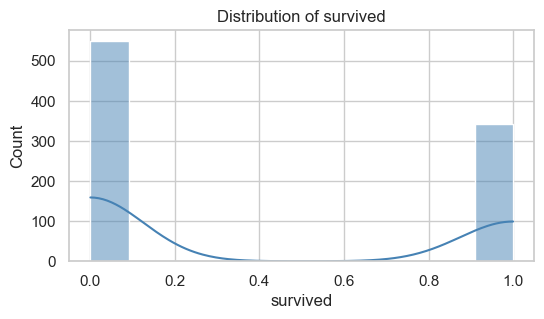

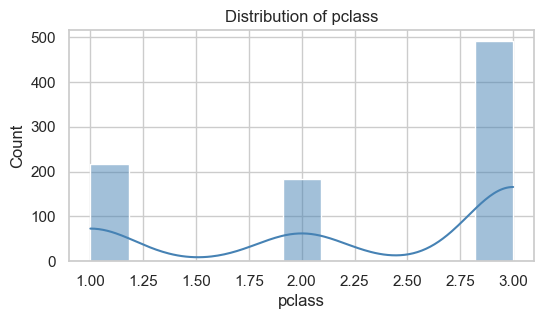

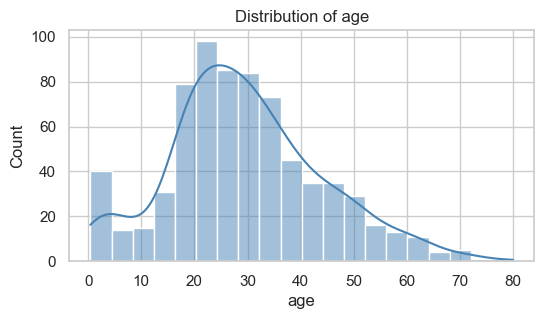

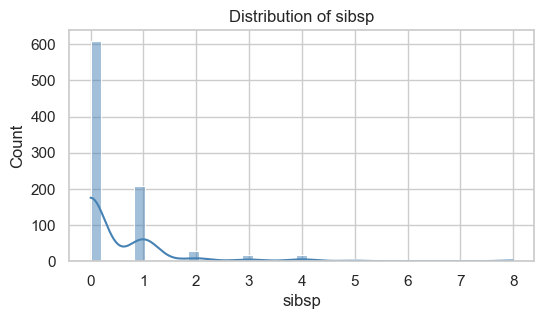

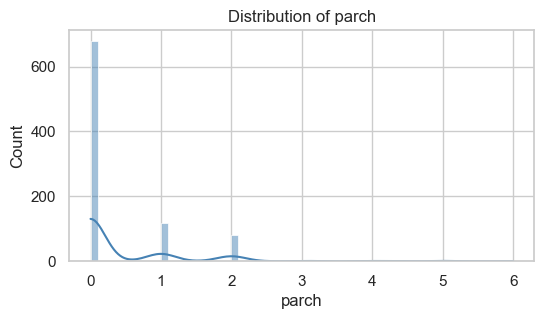

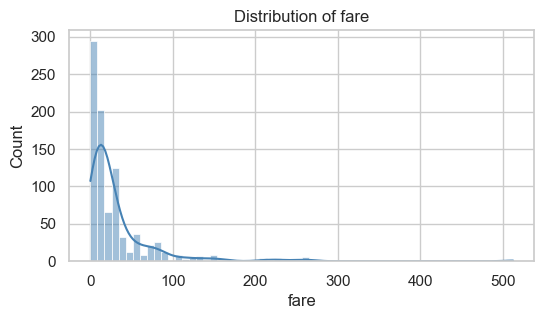

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\2755863880.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tabular, x=col, palette='viridis')


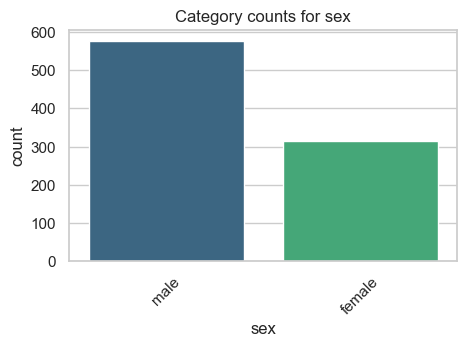

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\2755863880.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tabular, x=col, palette='viridis')


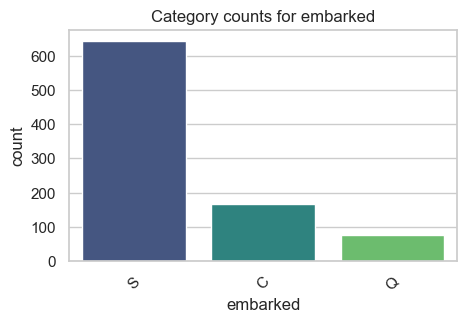

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\2755863880.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tabular, x=col, palette='viridis')


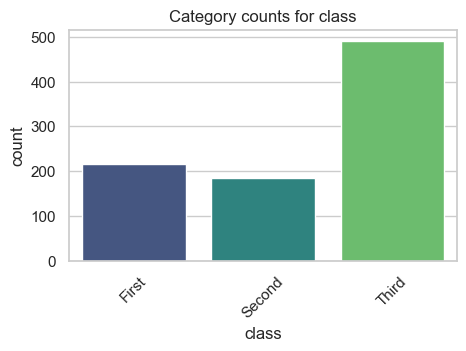

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\2755863880.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tabular, x=col, palette='viridis')


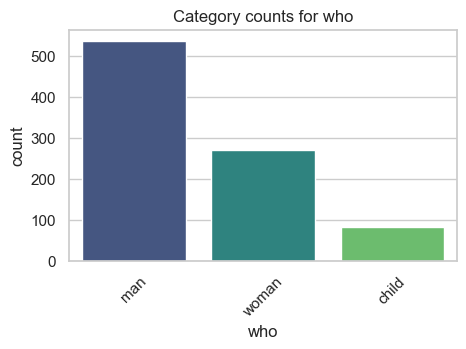

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\2755863880.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tabular, x=col, palette='viridis')


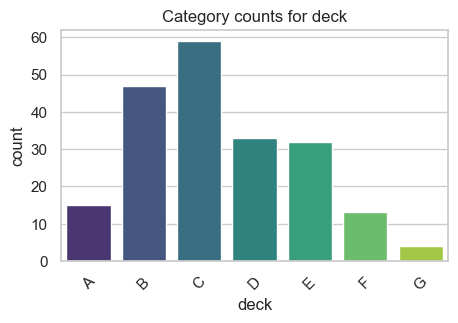

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\2755863880.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tabular, x=col, palette='viridis')


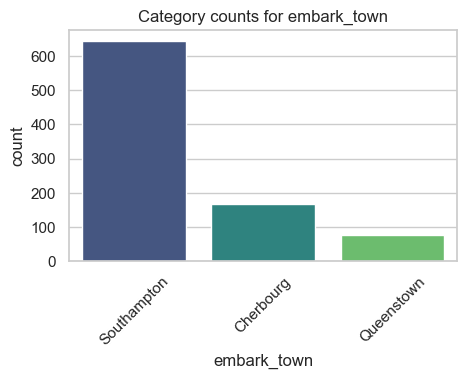

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\2755863880.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tabular, x=col, palette='viridis')


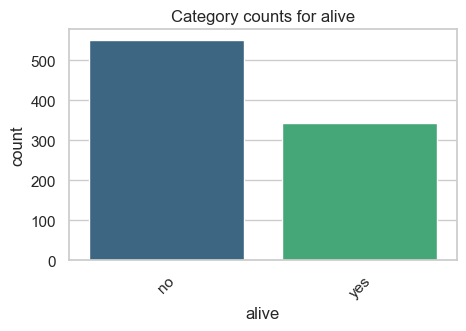

In [6]:
num_cols = df_tabular.select_dtypes(include=['int64','float64']).columns.tolist()

# Numeric distributions
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df_tabular[col], kde=True, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical distributions
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df_tabular, x=col, palette='viridis')
    plt.title(f"Category counts for {col}")
    plt.xticks(rotation=45)
    plt.show()

Univariate histograms quickly reveal skewness, outliers, and imbalance (e.g., class imbalance in survived).

## Bivariate & Outlier Analysis
We’ll check how numeric features relate to the target (if `survived` exists).

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\3594499924.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tabular, x=target_col, y=col, palette='Set2')


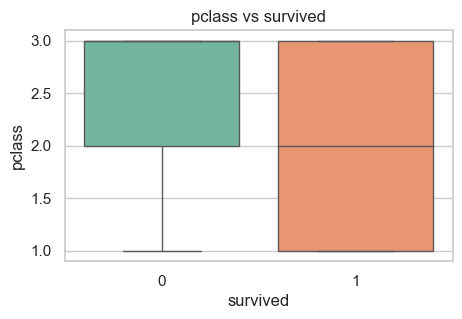

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\3594499924.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tabular, x=target_col, y=col, palette='Set2')


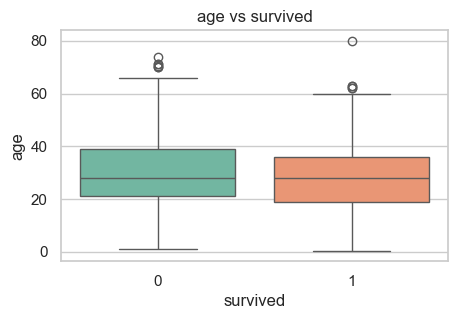

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\3594499924.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tabular, x=target_col, y=col, palette='Set2')


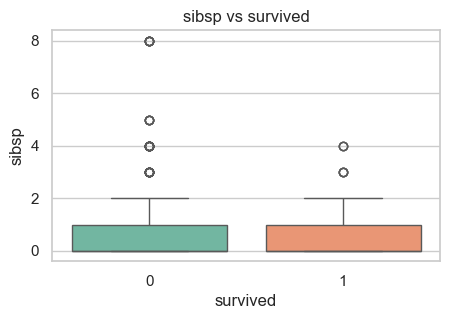

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\3594499924.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tabular, x=target_col, y=col, palette='Set2')


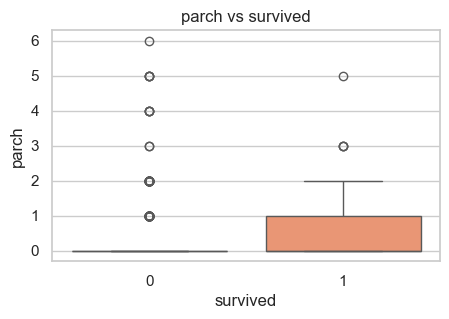

C:\Users\sayed\AppData\Local\Temp\ipykernel_45064\3594499924.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tabular, x=target_col, y=col, palette='Set2')


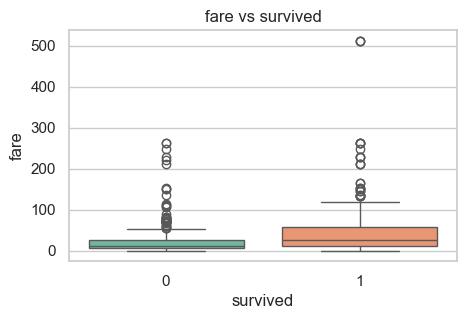

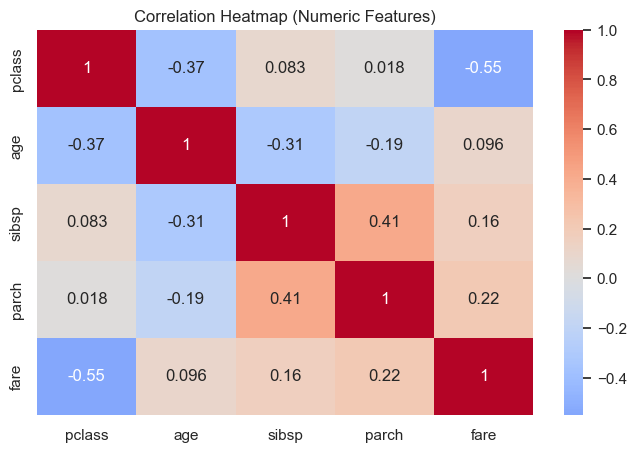

In [7]:
target_col = 'survived' if 'survived' in df_tabular.columns else None

if target_col:
    num_cols = [c for c in num_cols if c != target_col]

    for col in num_cols:
        plt.figure(figsize=(5,3))
        sns.boxplot(data=df_tabular, x=target_col, y=col, palette='Set2')
        plt.title(f"{col} vs {target_col}")
        plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(8,5))
corr = df_tabular[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Boxplots show how distributions change across target categories — useful for feature selection and detecting strong predictors.
The correlation heatmap hints at multicollinearity or redundant features.

# Data Preprocessing

## Handling Missing Values
Let’s simulate some missing data first (since our synthetic data doesn’t have any). Then, we’ll handle it properly.

In [8]:
df_clean = df_tabular.copy()

# Introduce some missing values artificially
np.random.seed(42)
for col in ['age', 'salary']:
    df_clean.loc[df_clean.sample(frac=0.05).index, col] = np.nan

print("Missing values count before cleaning:")
print(df_clean.isnull().sum())

# Check for columns that are completely missing
all_nan_cols = [col for col in df_clean.columns if df_clean[col].isna().all()]
print("\nColumns with all NaN values:", all_nan_cols)

# Option 1: Drop columns that are fully NaN (if any)
if all_nan_cols:
    df_clean.drop(columns=all_nan_cols, inplace=True)

# Impute only numeric columns that still exist
num_cols = df_clean.select_dtypes(include=[np.number]).columns
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

print("\nMissing values count after imputation:")
print(df_clean.isnull().sum())

Missing values count before cleaning:
survived         0
pclass           0
sex              0
age            211
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
salary         891
dtype: int64

Columns with all NaN values: ['salary']

Missing values count after imputation:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


It automatically handles real-world cases where some columns are fully missing (common in messy datasets).

You can later add logic to impute categorical columns with "most_frequent" too.

It ensures that imputation never mismatches shapes or causes overwrite errors.

## Encoding Categorical Columns
Convert categorical variables (gender, city) into numerical form.

In [9]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

# Detect categorical (object/string) columns automatically
cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns detected:", cat_cols)

if len(cat_cols) == 0:
    print("⚠️ No categorical columns found — skipping encoding step.")
else:
    # Apply Label Encoding to all categorical columns
    label_enc = LabelEncoder()
    for col in cat_cols:
        df_encoded[col] = label_enc.fit_transform(df_encoded[col])
    print(f"✅ Label encoding applied to: {cat_cols}")

df_encoded.head()

Categorical columns detected: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
✅ Label encoding applied to: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,2,2,1,True,7,2,0,False
1,1.0,1.0,0,38.0,1.0,0.0,71.2833,0,0,2,False,2,0,1,False
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,2,2,2,False,7,2,1,True
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,2,0,2,False,2,2,1,False
4,0.0,3.0,1,35.0,0.0,0.0,8.0500,2,2,1,True,7,2,0,True


In [10]:
print("Categorical columns detected:", cat_cols)

Categorical columns detected: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']


It auto-detects all categorical columns instead of assuming names like 'gender' or 'city'.

If your dataset has no string columns → it will skip encoding safely.

If it has, e.g., 'Category', 'Type', 'Label', etc. — it will automatically encode those.

## Scaling Numerical Features
We’ll automatically detect numeric columns (excluding target labels if you have any) and apply StandardScaler to bring them to zero mean & unit variance.

In [11]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_encoded.copy()

# Detect numeric columns
num_cols = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns detected:", num_cols)

# Scale numeric columns
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print(f"✅ Scaling applied to {len(num_cols)} numeric features.")
df_scaled.head()

Numeric columns detected: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
✅ Scaling applied to 13 numeric features.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,-0.789272,0.827377,0.737695,-0.580280,0.432793,-0.473674,-0.502445,0.581114,0.827377,-0.355242,True,0.512048,0.581114,-0.789272,False
1,1.266990,-1.566107,-1.355574,0.667045,0.432793,-0.473674,0.786845,-1.938460,-1.566107,1.328379,False,-1.914733,-1.938460,1.266990,False
2,1.266990,0.827377,-1.355574,-0.268449,-0.474545,-0.473674,-0.488854,0.581114,0.827377,1.328379,False,0.512048,0.581114,1.266990,True
3,1.266990,-1.566107,-1.355574,0.433171,0.432793,-0.473674,0.420730,0.581114,-1.566107,1.328379,False,-1.914733,0.581114,1.266990,False
4,-0.789272,0.827377,0.737695,0.433171,-0.474545,-0.473674,-0.486337,0.581114,0.827377,-0.355242,True,0.512048,0.581114,-0.789272,True


Automatically detects numeric columns (int, float, etc.).

Applies z-score normalization: `𝑧 = (𝑥 − 𝜇) / 𝜎`

Keeps everything else (categoricals, encoded vars) intact.

## Outlier Detection & Handling

Outliers can heavily distort model performance.
We’ll demonstrate two powerful methods to detect and handle them:

1. IQR Method (Interquartile Range) — Simple, robust to non-normal data.
2. Z-Score Method — Works well for normally distributed data.

In [12]:
Q1 = df_scaled[num_cols].quantile(0.25)
Q3 = df_scaled[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create mask for outliers
outlier_mask = ((df_scaled[num_cols] < lower_bound) | (df_scaled[num_cols] > upper_bound))
outlier_counts = outlier_mask.sum()

print("Outlier count per numeric column:")
print(outlier_counts)

# Optionally, remove outliers
df_no_outliers_iqr = df_scaled[~outlier_mask.any(axis=1)]
print(f"\nOriginal shape: {df_scaled.shape} | After IQR removal: {df_no_outliers_iqr.shape}")

Outlier count per numeric column:
survived         0
pclass           0
sex              0
age             94
sibsp           46
parch          213
fare           116
embarked         0
class            0
who              0
deck           203
embark_town      0
alive            0
dtype: int64

Original shape: (891, 15) | After IQR removal: (495, 15)


### Z-Score Method

In [13]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_scaled[num_cols]))
threshold = 3  # standard cutoff
outliers_z = (z_scores > threshold)

print("Number of outliers detected (Z-Score method):", np.sum(outliers_z))

# Optionally filter them out
df_no_outliers_z = df_scaled[(z_scores < threshold).all(axis=1)]
print(f"After Z-score filtering: {df_no_outliers_z.shape}")

Number of outliers detected (Z-Score method): 72
After Z-score filtering: (820, 15)


**NOTE:**
* IQR Method is non-parametric (doesn’t assume normal distribution).
* Z-score assumes data is roughly normal after scaling.
* In practice, you might use IQR for small datasets or RobustScaler + IQR for high-dimensional data.

## Feature Engineering (Creating New Features)
Let’s create a few examples that work on any dataset structure:

* Interaction features
* Ratio or log features
* Date-based features (if a date column exists)

In [14]:
df_feat = df_no_outliers_iqr.copy()

# Example 1: Interaction feature (age * fare if both exist)
if set(['age', 'fare']).issubset(df_feat.columns):
    df_feat['age_fare_interaction'] = df_feat['age'] * df_feat['fare']
    print("✅ Added 'age_fare_interaction' feature.")

# Example 2: Ratio feature (fare per class, if numeric class)
if set(['fare', 'pclass']).issubset(df_feat.columns):
    df_feat['fare_per_class'] = df_feat['fare'] / df_feat['pclass']
    print("✅ Added 'fare_per_class' feature.")

# Example 3: Log transformation for skewed columns
for col in df_feat.select_dtypes(include=[np.number]).columns:
    if (df_feat[col] > 0).all():  # log only positive
        df_feat[f'{col}_log'] = np.log1p(df_feat[col])

print(f"✅ Feature Engineering complete. Shape: {df_feat.shape}")

✅ Added 'age_fare_interaction' feature.
✅ Added 'fare_per_class' feature.
✅ Feature Engineering complete. Shape: (495, 18)


## Correlation Analysis

Now that we’ve engineered new features, let’s explore relationships between numerical variables. We’ll:

* Compute a correlation matrix
* Visualize it using a heatmap

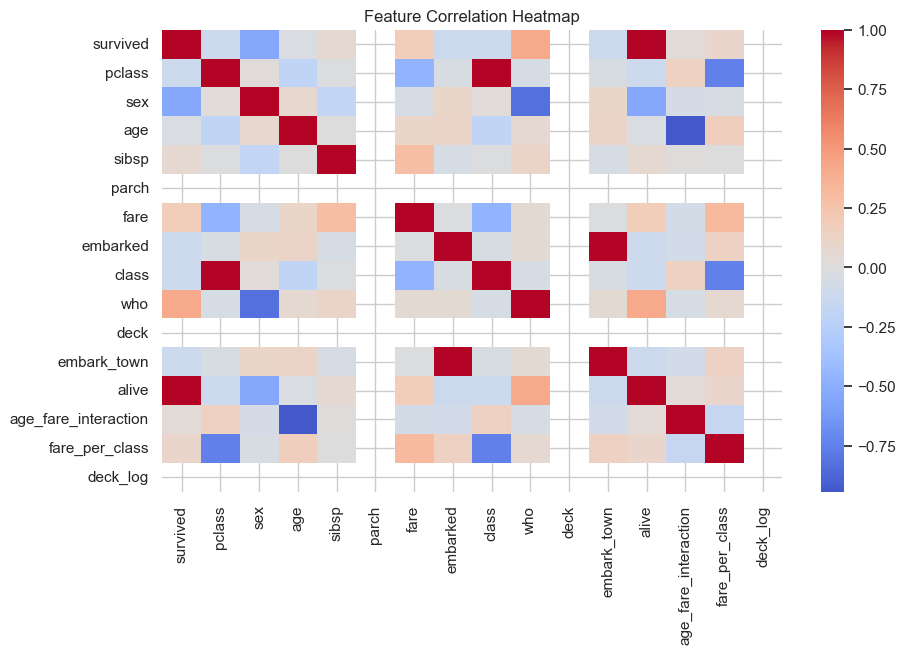

In [15]:
corr = df_feat.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

Identify multicollinearity (features that are too correlated, e.g., age and age_log).

Spot strong relationships with target (helps in feature selection).

Use it to decide model types:

* Linear models → fewer multicollinear features
* Tree models → handle correlation better

## Identify the Problem Type

In [16]:
def identify_problem(df, target_col):
    y = df[target_col]
    
    if y.dtype in ['float64', 'int64']:
        unique_vals = y.nunique()
        if unique_vals <= 20:
            return "Classification"
        else:
            return "Regression"
    elif y.dtype == 'object' or y.dtype.name == 'category':
        return "Classification"
    else:
        return "Unknown / Needs inspection"

# Example (change the target name based on your dataset)
target_col = 'survived' if 'survived' in df_feat.columns else df_feat.columns[-1]
problem_type = identify_problem(df_feat, target_col)
print(f"🧠 Problem Type Detected: {problem_type}")

🧠 Problem Type Detected: Classification


## Match Data Shape & Complexity to Algorithm

In [17]:
def suggest_model(df, problem_type):
    n_rows, n_features = df.shape
    
    if problem_type == "Classification":
        if n_rows < 10_000:
            model = ["Logistic Regression", "Random Forest", "XGBoost"]
        else:
            model = ["LightGBM", "CatBoost", "Neural Network"]
            
    elif problem_type == "Regression":
        if n_rows < 10_000:
            model = ["Linear Regression", "Random Forest Regressor"]
        else:
            model = ["XGBoost Regressor", "LightGBM", "Deep Neural Net"]
            
    else:
        model = ["Needs domain-specific analysis (NLP / CV / Time-series)"]
    
    return model

print("💡 Suggested Model Families:", suggest_model(df_feat, problem_type))

💡 Suggested Model Families: ['Logistic Regression', 'Random Forest', 'XGBoost']
